In [35]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [99]:
data = pd.read_csv('../Datasets/Salaries in Egypt at 2025 (الردود) - ردود النموذج 1.csv')

In [101]:
data.head()

,طابع زمني,Title,Years of Experiences,Salary,Date of Salary,What Is your Company,Work Type,Work Hour,City of Company site,النتيجة
0,5:21:22 م 2025/07/16,Front End,2,20000,2025/06/30,Egyption,Remotley,Full Time,cairo,NaN
1,5:53:52 م 2025/07/16,Full Stack .Net | Angular,3,26000,2025/07/01,Egyption,Remotley,Full Time,Cairo,NaN
2,5:56:21 م 2025/07/16,.Net Developsr,1.5 years,14000 EGP,2025/06/01,Egyption,Remotley,Full Time,Cairo,NaN
3,5:58:59 م 2025/07/16,IT Specialist,0,10000,2025/05/01,Egyption,On Site,Full Time,"Maadi, Cairo",NaN
4,5:59:28 م 2025/07/16,Front end,1,40000,2025/07/16,Not Egyption but site in egypt,Hybird,Full Time,Cairo,NaN


## 3. Data Exploration & Understanding

- **Initial data inspection**: Shape, columns, data types, missing values
- **Exploratory Data Analysis (EDA)**: Statistical summaries, distributions, correlations
- **Data quality assessment**: Completeness, accuracy, consistency, validity
- **Domain knowledge integration**: Understanding business context and data meaning

In [104]:
data.shape

(795, 10)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   طابع زمني              795 non-null    object 
 1   Title                  795 non-null    object 
 2   Years of Experiences   795 non-null    object 
 3   Salary                 795 non-null    object 
 4   Date of Salary         795 non-null    object 
 5   What Is your Company   795 non-null    object 
 6   Work Type              795 non-null    object 
 7   Work Hour              795 non-null    object 
 8   City of Company site   737 non-null    object 
 9   النتيجة                0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 62.2+ KB


In [108]:
data.duplicated().sum()

0

In [110]:
data.drop('النتيجة', inplace=True, axis=1)

In [112]:
data.head()

,طابع زمني,Title,Years of Experiences,Salary,Date of Salary,What Is your Company,Work Type,Work Hour,City of Company site
0,5:21:22 م 2025/07/16,Front End,2,20000,2025/06/30,Egyption,Remotley,Full Time,cairo
1,5:53:52 م 2025/07/16,Full Stack .Net | Angular,3,26000,2025/07/01,Egyption,Remotley,Full Time,Cairo
2,5:56:21 م 2025/07/16,.Net Developsr,1.5 years,14000 EGP,2025/06/01,Egyption,Remotley,Full Time,Cairo
3,5:58:59 م 2025/07/16,IT Specialist,0,10000,2025/05/01,Egyption,On Site,Full Time,"Maadi, Cairo"
4,5:59:28 م 2025/07/16,Front end,1,40000,2025/07/16,Not Egyption but site in egypt,Hybird,Full Time,Cairo


In [114]:
data.rename(columns={
    'طابع زمني': 'timestamp',
    'Title': 'title',
    'Years of Experiences': 'exp',
    'Salary': 'salary',
    'Date of Salary': 'salaryDate',  # new addition
    'What Is your Company': 'companyCountry',
    'Work Type': 'worktype',
    'Work Hour': 'workhour',
    'City of Company site': 'city'
}, inplace=True)

In [116]:
data.columns

Index(['timestamp', 'title', 'Years of Experiences ', 'salary', 'salaryDate',
       'companyCountry', 'worktype', 'workhour', 'city'],
      dtype='object')

In [118]:
data.city.isnull().sum()

58

In [120]:
data[data['city'].isnull()]

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city
9,6:19:06 م 2025/07/16,PHP developer,2,6000,2025/07/16,Egyption,Remotley,Part Time,NaN
90,8:47:35 م 2025/07/16,software tester,1,12500,2025/03/09,Egyption,Remotley,Full Time,NaN
93,8:55:40 م 2025/07/16,Odoo developer,1,5500,2025/07/16,Egyption,On Site,Full Time,NaN
103,9:06:37 م 2025/07/16,D365 FO Dev,10,1900 usd,2025/07/16,Not Egyption but site in egypt,Remotley,Full Time,NaN
111,9:20:14 م 2025/07/16,Product Owner,3,40000,2025/06/28,Not Egyption but site in egypt,Hybird,Full Time,NaN
116,9:26:21 م 2025/07/16,Frontend developer,4,60000,2025/07/23,Not Egyption but site in egypt,Hybird,Full Time,NaN
128,9:34:27 م 2025/07/16,Frontend Developer,5,48500,2023/05/05,Not Egyption but site in egypt,Remotley,Full Time,NaN
150,9:55:15 م 2025/07/16,Java team lead,10,4000 USD,2024/01/01,Not Egyption but site in egypt,Remotley,Full Time,NaN
160,10:09:19 م 2025/07/16,Full stack developer,2,370 $,2025/06/01,Not Egyption but site in egypt,Remotley,Full Time,NaN
165,10:23:36 م 2025/07/16,Next Js developer,1,20000,2025/07/16,Egyption,Remotley,Full Time,NaN


In [122]:
data.describe()

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city
count,795,795,795,795,795,795,795,795,737
unique,794,589,76,293,155,17,8,4,157
top,9:50:05 م 2025/07/16,Flutter Developer,1,30000,2025/07/01,Egyption,Hybird,Full Time,Cairo
freq,2,13,149,35,99,477,314,769,315


<Axes: xlabel='salary'>

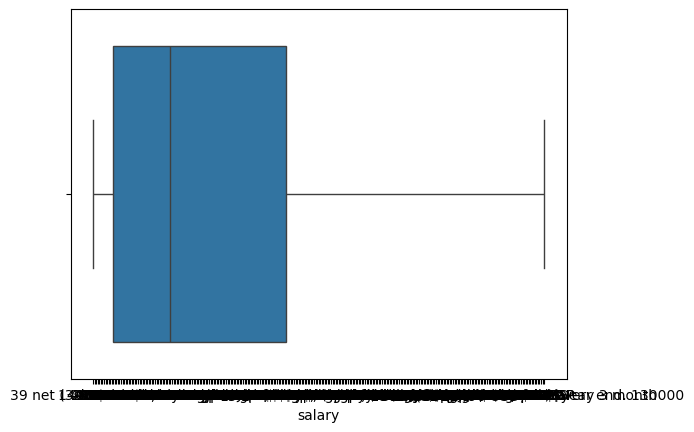

In [124]:
sns.boxplot(x=data['salary'])

## 4. Data Cleaning & Preprocessing

- **Handle missing values**: Imputation, removal, or flagging strategies
- **Data type corrections**: Convert strings to dates, fix categorical variables
- **Outlier detection and treatment**: Statistical methods or business rules
- **Data standardization**: Consistent formats, units, naming conventions
- **Feature engineering**: Create new variables, transformations, aggregations

Correct Data Types

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   timestamp              795 non-null    object
 1   title                  795 non-null    object
 2   Years of Experiences   795 non-null    object
 3   salary                 795 non-null    object
 4   salaryDate             795 non-null    object
 5   companyCountry         795 non-null    object
 6   worktype               795 non-null    object
 7   workhour               795 non-null    object
 8   city                   737 non-null    object
dtypes: object(9)
memory usage: 56.0+ KB


In [130]:
data.head(2)

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city
0,5:21:22 م 2025/07/16,Front End,2,20000,2025/06/30,Egyption,Remotley,Full Time,cairo
1,5:53:52 م 2025/07/16,Full Stack .Net | Angular,3,26000,2025/07/01,Egyption,Remotley,Full Time,Cairo


In [132]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

C:\Users\Malak\AppData\Local\Temp\ipykernel_37052\3764320322.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['timestamp'])


DateParseError: Unknown datetime string format, unable to parse: 5:21:22 م 2025/07/16, at position 0

In [133]:
data['timestamp'] = data['timestamp'].str.replace('م', '', regex=False)\
                                     .str.replace('ص', '', regex=False)\
                                     .str.strip()

In [151]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [137]:
data.head(2)

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city
0,2025-07-16 05:21:22,Front End,2,20000,2025/06/30,Egyption,Remotley,Full Time,cairo
1,2025-07-16 05:53:52,Full Stack .Net | Angular,3,26000,2025/07/01,Egyption,Remotley,Full Time,Cairo


In [143]:
for col in data.columns:
    if col != 'city': 
        data[col] = data[col].astype(str).str.strip()

data.rename(columns={
    'طابع زمني': 'timestamp',
    'Title': 'title',
    'Years of Experiences': 'exp',
    'Salary': 'salary',
    'Date of Salary': 'salaryDate',  # new addition
    'What Is your Company': 'companyCountry',
    'Work Type': 'worktype',
    'Work Hour': 'workhour',
    'City of Company site': 'city'
}, inplace=True)

print(data.columns)


Index(['timestamp', 'title', 'Years of Experiences ', 'salary', 'salaryDate',
       'companyCountry', 'worktype', 'workhour', 'city'],
      dtype='object')


In [145]:
data.head()

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city
0,2025-07-16 05:21:22,Front End,2,20000,2025/06/30,Egyption,Remotley,Full Time,cairo
1,2025-07-16 05:53:52,Full Stack .Net | Angular,3,26000,2025/07/01,Egyption,Remotley,Full Time,Cairo
2,2025-07-16 05:56:21,.Net Developsr,1.5 years,14000 EGP,2025/06/01,Egyption,Remotley,Full Time,Cairo
3,2025-07-16 05:58:59,IT Specialist,0,10000,2025/05/01,Egyption,On Site,Full Time,"Maadi, Cairo"
4,2025-07-16 05:59:28,Front end,1,40000,2025/07/16,Not Egyption but site in egypt,Hybird,Full Time,Cairo


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              795 non-null    datetime64[ns]
 1   title                  795 non-null    object        
 2   Years of Experiences   795 non-null    object        
 3   salary                 795 non-null    object        
 4   salaryDate             795 non-null    object        
 5   companyCountry         795 non-null    object        
 6   worktype               795 non-null    object        
 7   workhour               795 non-null    object        
 8   city                   737 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 56.0+ KB


In [159]:
data['salaryDate'] =  pd.to_datetime(data['salaryDate'], errors='coerce')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              795 non-null    datetime64[ns]
 1   title                  795 non-null    object        
 2   Years of Experiences   795 non-null    object        
 3   salary                 795 non-null    object        
 4   salaryDate             792 non-null    datetime64[ns]
 5   companyCountry         795 non-null    object        
 6   worktype               795 non-null    object        
 7   workhour               795 non-null    object        
 8   city                   737 non-null    object        
dtypes: datetime64[ns](2), object(7)
memory usage: 56.0+ KB


In [163]:
data['Years of Experiences '] = pd.to_numeric(data['Years of Experiences '])

ValueError: Unable to parse string "1.5 years" at position 2

In [165]:
data['Years of Experiences '].value_counts()

Years of Experiences 
1            149
2            147
3            110
4             68
5             52
            ... 
11             1
3.9            1
Half year      1
1997           1
Fresh          1
Name: count, Length: 70, dtype: int64

In [185]:
years_exp_map = {
    'Half year' : '1',
    '1997' : '28',
    'Fresh' : '0', 
    '3.9' : '4',
    '1.5 years' : '2', 
    'Less than a year' : '1', 
    '8.5' : '9', 
    '2.5' : '3', 
    '1.5' : '2', 
    '<1' : '1', 
    '3.5' : '4', 
    '0.75' : '1',
    '0.5' : '1', 
    'Junior' : '1',
    'less than 1' : '1', 
    '2.8' : '3', 
    '2 years' : '2', 
    '1 year' : '1',
    'Fresh graduate (1 year)' : '1', 
    '1-3' : '2', 
    '7 months' : '7', 
    '+5' : '6', 
    '1month' : '0', 
    'less than a year' : '1', 
    '1-2 year' : '2', 
    '1.8' : '2', 
    '2+' : '2', 
    '8month' : '1', 
    '0.65' : '1', 
    4 : '4', 
    1 : '1', 
    '6 months' : '1', 
    28 : '28', 
    '6.5' : '7',
    'almost 2 years': '2',
    '4.5':'5',
    'Almost 4' : '4',
    'Less than 2':'2',
    '.':'0',
    '< 1':'1',
    '3.6':'4',
    '3 years':'3',
    '1+':'1',
    '3 months till now': '0',
    '3 months':'0',
    '0 (~1)' : '0',
    '2 month' : '0',
    'Fresh +ITI':'0',
    '6 month':'1',
    '0 (3 months)': '0',
    '6 mo':'1',
    '5 months':'0',
    '-1':'0',
    '+4':'5',
    '2 months':'0',
    '5.5':'6',
    0 : '0'
}

In [187]:
data['Years of Experiences '] = data['Years of Experiences '].replace(years_exp_map)

In [197]:
data['Years of Experiences '].nunique()

70

In [199]:
data['Years of Experiences '].unique()

array(['2', '3', '1.5 years', '0', '1', '6', '4', '5', 'Less than a year',
       '8.5', '2.5', '1.5', '<1', '17', '3.5', '0.75', '0.5', 'Junior',
       '7', 'less than 1', '2.8', '9', '10', '2 years', '8', '1 year',
       'Fresh graduate (1 year)', '13', '1-3', '7 months', '+5', '1month',
       'less than a year', '1-2 year', '15', '1.8', '2+', '8month', '12',
       '0.65', '11', 4, 1, '6 months', 28, '6.5', 'almost 2 years', '4.5',
       'Almost 4', 'Less than 2', '.', '< 1', '3.6', '3 years', '1+',
       '3 months till now', '3 months', '18', '0 (~1)', '2 month',
       'Fresh +ITI', '6 month', '0 (3 months)', '6 mo', '5 months', '-1',
       '+4', '2 months', '5.5', 0], dtype=object)

In [201]:
years_exp_map = {
    'Half year' : '1',
    '1997' : '28',
    'Fresh' : '0', 
    '3.9' : '4',
    '1.5 years' : '2', 
    'Less than a year' : '1', 
    '8.5' : '9', 
    '2.5' : '3', 
    '1.5' : '2', 
    '<1' : '1', 
    '3.5' : '4', 
    '0.75' : '1',
    '0.5' : '1', 
    'Junior' : '1',
    'less than 1' : '1', 
    '2.8' : '3', 
    '2 years' : '2', 
    '1 year' : '1',
    'Fresh graduate (1 year)' : '1', 
    '1-3' : '2', 
    '7 months' : '7', 
    '+5' : '6', 
    '1month' : '0', 
    'less than a year' : '1', 
    '1-2 year' : '2', 
    '1.8' : '2', 
    '2+' : '2', 
    '8month' : '1', 
    '0.65' : '1', 
    4 : '4', 
    1 : '1', 
    '6 months' : '1', 
    28 : '28', 
    '6.5' : '7',
    'almost 2 years': '2',
    '4.5':'5',
    'Almost 4' : '4',
    'Less than 2':'2',
    '.':'0',
    '< 1':'1',
    '3.6':'4',
    '3 years':'3',
    '1+':'1',
    '3 months till now': '0',
    '3 months':'0',
    '0 (~1)' : '0',
    '2 month' : '0',
    'Fresh +ITI':'0',
    '6 month':'1',
    '0 (3 months)': '0',
    '6 mo':'1',
    '5 months':'0',
    '-1':'0',
    '+4':'5',
    '2 months':'0',
    '5.5':'6',
    0 : '0'
}

In [207]:
data['Years of Experiences '] = data['Years of Experiences '].replace(years_exp_map)

In [211]:
data['Years of Experiences '].unique()

array(['2', '3', '0', '1', '6', '4', '5', '9', '17', '7', '10', '8', '13',
       '15', '12', '11', '28', '18'], dtype=object)

In [213]:
data['Years of Experiences '] = pd.to_numeric(data['Years of Experiences '])

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              795 non-null    datetime64[ns]
 1   title                  795 non-null    object        
 2   Years of Experiences   795 non-null    int64         
 3   salary                 795 non-null    object        
 4   salaryDate             792 non-null    datetime64[ns]
 5   companyCountry         795 non-null    object        
 6   worktype               795 non-null    object        
 7   workhour               795 non-null    object        
 8   city                   737 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 56.0+ KB


In [217]:
data['companyCountry'].unique()

array(['Egyption', 'Not Egyption but site in egypt', 'corporate',
       'Not Egyption and site out of egypt',
       'Saudi backdoor (dev team in Egypt)', 'DXC', 'Multinational',
       'Else', 'Ag', 'Egyptian and site out of Egypt',
       'Egyptian but all work outside Egypt', '.',
       'Startup in canada , but there’s no site just online work and the whole team from Egypt',
       'morocco', 'Fully remote operations', "I don't own a company",
       'Egyptian but have offices in Egypt, KSA, the UAE, and others'],
      dtype=object)

In [225]:
data.groupby(data['companyCountry'], as_index=False)['worktype'].count()

,companyCountry,worktype
0,.,1
1,Ag,1
2,DXC,1
3,Egyptian and site out of Egypt,1
4,Egyptian but all work outside Egypt,1
5,"Egyptian but have offices in Egypt, KSA, the U...",1
6,Egyption,477
7,Else,1
8,Fully remote operations,1
9,I don't own a company,1


In [229]:
# search for morocco -> onsite, so companycountry is not egyptian and site outside
# DXC -> remotely, can not figure out inside or outside egypt but probably outside
# Multinational -> hybird, can not figure out too -> will put it else
# Fully remote operations, also will put else
pd.crosstab(data['companyCountry'], data['worktype'])

worktype,.,Any of them?,Anything,Depends On Project,Hybird,On Site,Remote Hourly based,Remotley
companyCountry,,,,,,,,
.,1,0,0,0,0,0,0,0
Ag,0,0,0,0,0,1,0,0
DXC,0,0,0,0,0,0,0,1
Egyptian and site out of Egypt,0,0,0,0,0,0,0,1
Egyptian but all work outside Egypt,0,0,0,0,0,0,0,1
"Egyptian but have offices in Egypt, KSA, the UAE, and others",0,0,0,0,1,0,0,0
Egyption,0,0,1,0,192,173,0,111
Else,0,0,0,0,0,0,0,1
Fully remote operations,0,0,0,0,0,0,0,1


In [249]:
company_map = {
       'Egyption' : 'Egyption and site in egypt',
       'corporate' : 'Else',
       'Saudi backdoor (dev team in Egypt)':'Not Egyption but site in egypt',
       'DXC':'Not Egyption and site out of egypt',
       'Multinational':'Else',
       'Ag':'Else',
       'Egyptian but all work outside Egypt':'Egyptian and site out of Egypt',
       '.' : 'Else',
       'Startup in canada , but there’s no site just online work and the whole team from Egypt':'Not Egyption and site out of egypt',
       'morocco': 'Not Egyption and site out of egypt',
       'Fully remote operations':'Else' , 
       "I don't own a company":'Else',
       'Egyptian but have offices in Egypt, KSA, the UAE, and others':'Egyption and site in egypt'
}

In [251]:
data['companyCountry'] = data['companyCountry'].replace(company_map)

In [253]:
data['companyCountry'].unique()

array(['Egyption and site in egypt', 'Not Egyption but site in egypt',
       'Else', 'Not Egyption and site out of egypt',
       'Egyptian and site out of Egypt'], dtype=object)

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              795 non-null    datetime64[ns]
 1   title                  795 non-null    object        
 2   Years of Experiences   795 non-null    int64         
 3   salary                 795 non-null    object        
 4   salaryDate             792 non-null    datetime64[ns]
 5   companyCountry         795 non-null    object        
 6   worktype               795 non-null    object        
 7   workhour               795 non-null    object        
 8   city                   737 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 56.0+ KB


In [257]:
data['worktype'].unique()

array(['Remotley', 'On Site', 'Hybird', 'Depends On Project',
       'Remote Hourly based', '.', 'Anything', 'Any of them?'],
      dtype=object)

In [259]:
work_map = {
    'Remotley' : 'Remote', 
     'Hybird' : 'Hybrid',
    'Depends On Project':'Hybrid',
    'Remote Hourly based' : 'Remote',
    '.' : 'Hybrid',
    'Anything':'Hybrid',
    'Any of them?':'Hybrid'
}

In [261]:
data['worktype'] = data['worktype'].replace(work_map)

In [263]:
data['worktype'].unique()

array(['Remote', 'On Site', 'Hybrid'], dtype=object)

In [265]:
data['workhour'].unique()

array(['Full Time', 'Part Time', '.', 'Anything'], dtype=object)

In [269]:
data['workhour'] = data['workhour'].replace({'.':'Part Time', 'Anything':'Part Time'})

In [271]:
data['workhour'].unique()

array(['Full Time', 'Part Time'], dtype=object)

In [273]:
data['city'].unique()

array(['cairo', 'Cairo ', 'Cairo', 'Maadi, Cairo', 'Cairo, Riyadh', nan,
       'Cairo and dubai', 'Australia', 'Alexandria', 'new cairo',
       'Cairo, Maadi', 'Kuwait', 'New Cairo ', 'Saudi', 'uk', 'Dubia',
       'Jiza', 'Cairo , Switzerland ', 'Dubai', 'Cairo, Saudia ', 'Giza',
       'Jordan ', 'California', 'Cairo, Dubai, Morocco and 2 other sites',
       'Mansoura', 'New Cairo', 'KSA', 'Manama', 'Riyadh',
       'Giza, 6th of October', 'Giza ', 'Canada', 'Riyad ',
       'Cairo, Egypt', 'Bany swef', 'Berlin , Germany', 'Lebnanon',
       'El-Minia', 'United kingdom ', 'Cairo, Nasr City ', 'tanta',
       'Alexandria ', 'alexandria ', '-', '6 October ', 'Shiekh zayed ',
       'Saudi arabia', 'USA ', 'Riyhad', 'United Arab Emirates ', 'ksa',
       'USA', '6th of October ', 'جدة', 'US', 'Georgia',
       'riyadh saudi arabia', 'Alexandria, Egypt ',
       '6th of October, Giza', 'Saudi Arabia', 'Cairo,maadi', 'Sudia',
       'Mansoura ', 'dubai', 'Tanta', 'Suez', 'Poland', 'Sau

In [275]:
data[data['city'].isnull()]

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city
9,2025-07-16 06:19:06,PHP developer,2,6000,2025-07-16,Egyption and site in egypt,Remote,Part Time,NaN
90,2025-07-16 08:47:35,software tester,1,12500,2025-03-09,Egyption and site in egypt,Remote,Full Time,NaN
93,2025-07-16 08:55:40,Odoo developer,1,5500,2025-07-16,Egyption and site in egypt,On Site,Full Time,NaN
103,2025-07-16 09:06:37,D365 FO Dev,10,1900 usd,2025-07-16,Not Egyption but site in egypt,Remote,Full Time,NaN
111,2025-07-16 09:20:14,Product Owner,3,40000,2025-06-28,Not Egyption but site in egypt,Hybrid,Full Time,NaN
116,2025-07-16 09:26:21,Frontend developer,4,60000,2025-07-23,Not Egyption but site in egypt,Hybrid,Full Time,NaN
128,2025-07-16 09:34:27,Frontend Developer,5,48500,2023-05-05,Not Egyption but site in egypt,Remote,Full Time,NaN
150,2025-07-16 09:55:15,Java team lead,10,4000 USD,2024-01-01,Not Egyption but site in egypt,Remote,Full Time,NaN
160,2025-07-16 10:09:19,Full stack developer,2,370 $,2025-06-01,Not Egyption but site in egypt,Remote,Full Time,NaN
165,2025-07-16 10:23:36,Next Js developer,1,20000,2025-07-16,Egyption and site in egypt,Remote,Full Time,NaN


In [277]:
for idx, row in data[data['city'].isnull()].iterrows():

    if row['companyCountry'] in ['Egyption and site in egypt', 'Not Egyption but site in egypt']:
        data.at[idx, 'city'] = 'Cairo'

    elif row['companyCountry'] == 'Not Egyption and site out of egypt':
        if 'USD' in str(row['salary']):
            data.at[idx, 'city'] = 'Dubai'
        else:
            data.drop(index=idx, inplace=True)

    elif row['companyCountry'] == 'Else':
        data.drop(index=idx, inplace=True)

In [279]:
data[data['city'].isnull()]

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              792 non-null    datetime64[ns]
 1   title                  792 non-null    object        
 2   Years of Experiences   792 non-null    int64         
 3   salary                 792 non-null    object        
 4   salaryDate             790 non-null    datetime64[ns]
 5   companyCountry         792 non-null    object        
 6   worktype               792 non-null    object        
 7   workhour               792 non-null    object        
 8   city                   792 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 94.2+ KB


In [283]:
data['city'].unique()

array(['cairo', 'Cairo ', 'Cairo', 'Maadi, Cairo', 'Cairo, Riyadh',
       'Cairo and dubai', 'Australia', 'Alexandria', 'new cairo',
       'Cairo, Maadi', 'Kuwait', 'New Cairo ', 'Saudi', 'uk', 'Dubia',
       'Jiza', 'Cairo , Switzerland ', 'Dubai', 'Cairo, Saudia ', 'Giza',
       'Jordan ', 'California', 'Cairo, Dubai, Morocco and 2 other sites',
       'Mansoura', 'New Cairo', 'KSA', 'Manama', 'Riyadh',
       'Giza, 6th of October', 'Giza ', 'Canada', 'Riyad ',
       'Cairo, Egypt', 'Bany swef', 'Berlin , Germany', 'Lebnanon',
       'El-Minia', 'United kingdom ', 'Cairo, Nasr City ', 'tanta',
       'Alexandria ', 'alexandria ', '-', '6 October ', 'Shiekh zayed ',
       'Saudi arabia', 'USA ', 'Riyhad', 'United Arab Emirates ', 'ksa',
       'USA', '6th of October ', 'جدة', 'US', 'Georgia',
       'riyadh saudi arabia', 'Alexandria, Egypt ',
       '6th of October, Giza', 'Saudi Arabia', 'Cairo,maadi', 'Sudia',
       'Mansoura ', 'dubai', 'Tanta', 'Suez', 'Poland', 'Saudi Ar

In [297]:
city_mapping = {
    # Existing Cairo/Giza/Dubai fixes
    'cairo': 'Cairo', 'Cairo ': 'Cairo', 'Cairo': 'Cairo',
    'Maadi, Cairo': 'Cairo', 'new cairo': 'Cairo',
    'Cairo, Maadi': 'Cairo', 'New Cairo ': 'Cairo',
    'Cairo, Saudia ': 'Cairo', 'Cairo, Egypt': 'Cairo',
    'Cairo, Nasr City ': 'Cairo', 'Cairo , Switzerland ': 'Cairo',
    'Cairo 5th settlement ': 'Cairo', 'Cairo maadi': 'Cairo',
    'Cairo, dubai': 'Cairo', 'Cairo, Head office in Riyadh ': 'Cairo',
    'New Cairo': 'Cairo', 'new capital': 'Cairo',
    'Cairo AUC': 'Cairo', 'Smart Village, Giza, Egypt': 'Giza', 'Cairo,maadi':'Cairo',
    'Cairo, nasr city' : 'Cairo', 'New Cairo, Egypt' :'Cairo', 'Digla, Maadi':'Cairo', 'New cairo':'Cairo', 'e& Egypt':'Cairo', 'cairo ':'Cairo', 'Maadi ':'Cairo',

    'Jiza': 'Giza', 'Giza, 6th of October': 'Giza', 'Giza ': 'Giza',
    'giza': 'Giza', 'giza , egypt': 'Giza', 'Smart village, giza': 'Giza',

    'Dubia': 'Dubai', 'dubai': 'Dubai', 'Dubai ': 'Dubai',
    'Cairo and dubai': 'Dubai', 'Abudhabi': 'Abu Dhabi',

    'Alexandria ': 'Alexandria', 'alexandria ': 'Alexandria',
    'Alex': 'Alexandria', 'Alexandria, Egypt ': 'Alexandria',

    # Riyadh / KSA variations
    'Saudi': 'Riyadh', 'KSA': 'Riyadh', 'ksa': 'Riyadh',
    'Riyad': 'Riyadh', 'Riyad ': 'Riyadh', 'Riyadh ': 'Riyadh',
    'Saudia': 'Riyadh', 'Sudia': 'Riyadh', 'ryadii': 'Riyadh',
    'Al Riyadh': 'Riyadh', 'Ryad': 'Riyadh',
    'riyadh saudi arabia': 'Riyadh', 'Saudi arabia':'Riyadh',

    # Jeddah
    'جدة': 'Jeddah', 'Jeddah, Saudi Arabia': 'Jeddah', 

    # October city variants
    '6 October ': '6th of October', '6 October, Giza': '6th of October',
    '6th of October ': '6th of October', '6th of October, Giza': '6th of October',
    '6 October': '6th of October', '6 october': '6th of October',
    '6th October': '6th of October', '6th October Giza': '6th of October',

    # Mansoura variations
    'Mansoura ': 'Mansoura', 'mansoura': 'Mansoura',

    # Other Egyptian cities
    'Tanta': 'Tanta', 'tanta': 'Tanta',
    'Suez': 'Suez', 'Zagazig ': 'Zagazig', 'Bany swef': 'Beni Suef',
    'El-Minia': 'Minya', 'Madint Nasr': 'Nasr City',
    'Shrouk': 'Shorouk', "Ten's of Ramadan ": '10th of Ramadan',
    '10th of Ramadan city': '10th of Ramadan',

    # International fixes
    'USA ': 'USA', 'USA': 'USA', 'US': 'USA',
    'USA Texas': 'USA', 'Florida, US': 'USA',
    'United States': 'USA',

    'United Arab Emirates ': 'UAE', 'UAE': 'UAE',
    'Abu Dhabi': 'Abu Dhabi',

    'United Kingdom, London': 'London', 'UK': 'UK', 'uk': 'UK',
    'United kingdom ': 'UK', 'London': 'London',

    'Saudi Arabia': 'Riyadh', 'Saudi Arabia ': 'Riyadh',
    'Cairo, Saudi Arabia ': 'Riyadh',

    'France': 'France', 'France bank': 'France',
    'Germany': 'Germany', 'Berlin, Germany': 'Berlin',
    'Berlin , Germany': 'Berlin', 'Berlin': 'Berlin',
    'Magdeburg, Germany ': 'Magdeburg',

    'Poland': 'Poland', 'Warsaw': 'Warsaw',
    'Georgia': 'Georgia', 'GA': 'Georgia',

    'Oman': 'Oman', 'Jordan': 'Amman', 'Amman': 'Amman',
    'Amman Jordan ': 'Amman', 'Amman, Jordan': 'Amman',

    'Vancouver': 'Vancouver', 'Zurich': 'Zurich', 'Munich': 'Munich',
    'Monreal': 'Montreal', 'Dynmark': 'Denmark',

    'California ': 'California', 'California': 'California',

    # Misc
    'Cario': 'Cairo', 'Cai': 'Cairo', 'We': 'Else', 'No sites ': 'Else',
    'No office ': 'Else', '...': 'Else', 'Fry Barton Traders': 'Else', '-':'Else', 'its located in egypt and egyptian but mother company in emirates ':'Dubai'
}

In [299]:
data['city'] = data['city'].replace(city_mapping)

In [301]:
data['city'].unique()

array(['Cairo', 'Cairo, Riyadh', 'Dubai', 'Australia', 'Alexandria',
       'Kuwait', 'Riyadh', 'UK', 'Giza', 'Jordan ', 'California',
       'Cairo, Dubai, Morocco and 2 other sites', 'Mansoura', 'Manama',
       'Canada', 'Beni Suef', 'Berlin', 'Lebnanon', 'Minya', 'Tanta',
       'Else', '6th of October', 'Shiekh zayed ', 'USA', 'Riyhad', 'UAE',
       'Jeddah', 'Georgia', 'Suez', 'Poland', 'Abu Dhabi', 'Marsa Alam',
       'Zayed', 'New Yourk', 'October ', 'Cairo ,KSA',
       'Alexandria , Borg Alarab', 'Amman', 'Cairo and riyadh',
       'Obour City ', 'New Administrative capital ', 'France', 'Zagazig',
       'Vancouver', 'Cairo, Dubai',
       'Egypt , Dubai , USA , Qatar , Oman , Swaziland ',
       'mohandseen giza', 'Nasr City', 'Warsaw', 'Munich', 'London',
       'Oman', '10th of Ramadan', 'Denmark', 'Montreal', 'Kuwait ',
       'rabat', 'UK - Cairo - Germany', 'Cairo, multinational HQ Itlay',
       'Zurich', 'Germany', 'AL- Sheikh Zayed ', 'Shorouk',
       'Egypt;UK;Ge

In [303]:
# Detect if there’s more than one location by checking for commas or multiple words separated by certain patterns
data['city'] = data['city'].apply(
    lambda x: 'Multi Site' if isinstance(x, str) and (',' in x or ' and ' in x or ';' in x) else x
)

In [305]:
data['city'].unique()

array(['Cairo', 'Multi Site', 'Dubai', 'Australia', 'Alexandria',
       'Kuwait', 'Riyadh', 'UK', 'Giza', 'Jordan ', 'California',
       'Mansoura', 'Manama', 'Canada', 'Beni Suef', 'Berlin', 'Lebnanon',
       'Minya', 'Tanta', 'Else', '6th of October', 'Shiekh zayed ', 'USA',
       'Riyhad', 'UAE', 'Jeddah', 'Georgia', 'Suez', 'Poland',
       'Abu Dhabi', 'Marsa Alam', 'Zayed', 'New Yourk', 'October ',
       'Amman', 'Obour City ', 'New Administrative capital ', 'France',
       'Zagazig', 'Vancouver', 'mohandseen giza', 'Nasr City', 'Warsaw',
       'Munich', 'London', 'Oman', '10th of Ramadan', 'Denmark',
       'Montreal', 'Kuwait ', 'rabat', 'UK - Cairo - Germany', 'Zurich',
       'Germany', 'AL- Sheikh Zayed ', 'Shorouk', 'Baghdad', 'Magdeburg'],
      dtype=object)

In [ ]:
'Riyhad':'Riyadh', 'UAE':'Dubai', 'Zayed':'Shiekh zayed', 'Shiekh zayed ':'Shiekh zayed', 'New Yourk':'New York', 'October':'6th of October','mohandseen giza':'Giza', 'UK - Cairo - Germany':'Multi Site','AL- Sheikh Zayed ':'Shiekh zayed' 

In [311]:
# Your specific mapping
city_map = {
    'Riyhad': 'Riyadh',
    'UAE': 'Dubai',
    'Zayed': 'Shiekh zayed',
    'Shiekh zayed ': 'Shiekh zayed',
    'New Yourk': 'New York',
    'October ': '6th of October',
    'mohandseen giza': 'Giza',
    'UK - Cairo - Germany': 'Multi Site',
    'AL- Sheikh Zayed ': 'Shiekh zayed',
    'UK':'London', 
    'Germany':'Zurich'
}

# Apply mapping
data['city'] = data['city'].replace(city_map)

# Multi Site detection for strings with >1 location
data['city'] = data['city'].apply(
    lambda x: 'Multi Site' if isinstance(x, str) and (',' in x or ' and ' in x or ';' in x) else x
)

In [313]:
data['city'].unique()

array(['Cairo', 'Multi Site', 'Dubai', 'Australia', 'Alexandria',
       'Kuwait', 'Riyadh', 'London', 'Giza', 'Jordan ', 'California',
       'Mansoura', 'Manama', 'Canada', 'Beni Suef', 'Berlin', 'Lebnanon',
       'Minya', 'Tanta', 'Else', '6th of October', 'Shiekh zayed', 'USA',
       'Jeddah', 'Georgia', 'Suez', 'Poland', 'Abu Dhabi', 'Marsa Alam',
       'New York', 'Amman', 'Obour City ', 'New Administrative capital ',
       'France', 'Zagazig', 'Vancouver', 'Nasr City', 'Warsaw', 'Munich',
       'Oman', '10th of Ramadan', 'Denmark', 'Montreal', 'Kuwait ',
       'rabat', 'Zurich', 'Shorouk', 'Baghdad', 'Magdeburg'], dtype=object)

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 794
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              792 non-null    datetime64[ns]
 1   title                  792 non-null    object        
 2   Years of Experiences   792 non-null    int64         
 3   salary                 792 non-null    object        
 4   salaryDate             790 non-null    datetime64[ns]
 5   companyCountry         792 non-null    object        
 6   worktype               792 non-null    object        
 7   workhour               792 non-null    object        
 8   city                   792 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 94.2+ KB


In [317]:
data['salary'].unique()

array(['20000', '26000', '14000 EGP', '10000', '40000', '45000', '30000',
       '22000', '6000', '35000', '25', '75000', '14000', '60000',
       '700 usd', '17000', '43000', '9175', '1000 usd', '18000', '250$',
       '660 USD', '12000', '25000 EGP', '400$ with bonus', '24000',
       '600 usd', '55000', '12500', '37000', '65000', '42000', '100',
       '600 USD', '8000', '53000', '100000', '8500', '15', '58000',
       '23000', '1100', '800 usd', '20500', '34000', '1400 USD', '32000',
       '13000', '25000', '21000', '1500 USD', '7500', '41,000 EGP',
       '1650 USD', '50000 egp', '1850 USD', '20000 egp', '27000',
       '650 usd', '31000', '5500', '66000', '25k net', '3200', '39000',
       '1900 usd', '55000 egp net', '50k', '1200 USD', '15000', '550 usd',
       '11000', '18k EGP', '63k', '9000', '19250', '28000', '48500',
       '51678', '36000', '19000', '1200 usd', '30000 egp', '180000',
       '62500', '4000 USD', '22', '130000', '2000 USD', '30k', '70',
       '370 $', '15

In [319]:
import re
import numpy as np

# Step 1 — define a helper function
def extract_salary_and_currency(val):
    if pd.isnull(val):
        return np.nan, np.nan

    text = str(val).strip().lower()

    # Detect currency
    if "usd" in text or "$" in text:
        currency = "USD"
    elif "egp" in text or "le" in text:
        currency = "EGP"
    elif "sar" in text:
        currency = "SAR"
    elif "aed" in text:
        currency = "AED"
    elif "euro" in text or "eur" in text or "€" in text:
        currency = "EUR"
    elif "dirham" in text:
        currency = "AED"
    else:
        currency = "EGP"  # default if no currency found

    # Extract numeric part
    num_match = re.findall(r"[\d\.,]+", text)
    if num_match:
        # Remove commas and convert to int
        amount = int(float(num_match[0].replace(",", "")))
    else:
        amount = np.nan

    return amount, currency

# Step 2 — apply the function
data[['salary_clean', 'currency']] = data['salary'].apply(
    lambda x: pd.Series(extract_salary_and_currency(x))
)

# Step 3 — replace original salary column with cleaned version (if desired)
data['salary'] = data['salary_clean'].astype('Int64')  # nullable int
data.drop(columns='salary_clean', inplace=True)


In [321]:
data.head()

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city,currency
0,2025-07-16 05:21:22,Front End,2,20000,2025-06-30,Egyption and site in egypt,Remote,Full Time,Cairo,EGP
1,2025-07-16 05:53:52,Full Stack .Net | Angular,3,26000,2025-07-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP
2,2025-07-16 05:56:21,.Net Developsr,2,14000,2025-06-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP
3,2025-07-16 05:58:59,IT Specialist,0,10000,2025-05-01,Egyption and site in egypt,On Site,Full Time,Cairo,EGP
4,2025-07-16 05:59:28,Front end,1,40000,2025-07-16,Not Egyption but site in egypt,Hybrid,Full Time,Cairo,EGP


In [325]:
data['salary'].dtype

Int64Dtype()

In [327]:
data['currency'].value_counts()

currency
EGP    686
USD     97
EUR      5
AED      3
SAR      1
Name: count, dtype: int64

In [331]:
data.to_csv('cleaned_egypt_tech_salary.csv', index=False)

# DATA FINALLYYYY CLEANNNN